In [102]:
#RESOURECES
#https://www.kaggle.com/dgawlik/house-prices-eda

In [103]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [104]:
train = pd.read_csv('train.csv', sep=",")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [105]:
train_data = train.reindex(
    np.random.permutation(train.index))

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,...,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,...,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [106]:
def preprocess_features(train):
    selected_features = train[
    ["OverallQual","YearBuilt", "YearRemodAdd"]]
    processed_features = selected_features.copy()
    return processed_features

def preprocess_targets(train):
    output_targets = pd.DataFrame()
      # Scale the target to be in units of thousands of dollars.
    output_targets["SalePrice"] = (
    train["SalePrice"] / 1000.0)
    return output_targets

In [107]:
training_examples = preprocess_features(train.head(1460))
training_targets = preprocess_targets(train.head(1460))

In [108]:
correlation_dataframe = train.copy()
correlation_dataframe["target"] = training_targets["SalePrice"]

correlation_dataframe.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,target
Id,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.1,-0.0,...,-0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,0.0,-0.0,-0.0
MSSubClass,0.0,1.0,-0.4,-0.1,0.0,-0.1,0.0,0.0,0.0,-0.1,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.1,-0.1
LotFrontage,-0.0,-0.4,1.0,0.4,0.3,-0.1,0.1,0.1,0.2,0.2,...,0.2,0.0,0.1,0.0,0.2,0.0,0.0,0.0,0.4,0.4
LotArea,-0.0,-0.1,0.4,1.0,0.1,-0.0,0.0,0.0,0.1,0.2,...,0.1,-0.0,0.0,0.0,0.1,0.0,0.0,-0.0,0.3,0.3
OverallQual,-0.0,0.0,0.3,0.1,1.0,-0.1,0.6,0.6,0.4,0.2,...,0.3,-0.1,0.0,0.1,0.1,-0.0,0.1,-0.0,0.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.0,-0.0,0.0,0.0,-0.0,0.1,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0
MoSold,0.0,-0.0,0.0,0.0,0.1,-0.0,0.0,0.0,-0.0,-0.0,...,0.1,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.1,0.0,0.0
YrSold,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,...,-0.1,-0.0,0.0,0.0,-0.1,0.0,-0.1,1.0,-0.0,-0.0
SalePrice,-0.0,-0.1,0.4,0.3,0.8,-0.1,0.5,0.5,0.5,0.4,...,0.3,-0.1,0.0,0.1,0.1,-0.0,0.0,-0.0,1.0,1.0


In [109]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [110]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [111]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    ):

  

  periods = 10
  steps_per_period = steps / periods

  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
    
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["SalePrice"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["SalePrice"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])

    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))

    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
  print("Model training finished.")

  
  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.legend()

  return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 59.26
  period 01 : 56.76
  period 02 : 51.12
  period 03 : 51.15
  period 04 : 51.12
  period 05 : 51.07
  period 06 : 51.07
  period 07 : 51.07
  period 08 : 51.06
  period 09 : 51.09
Model training finished.


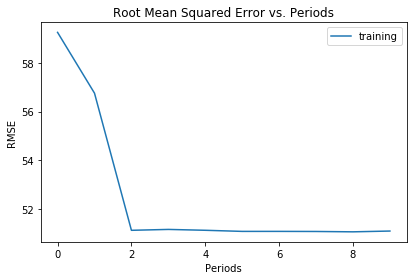

In [112]:
#
# Your code here: add your features of choice as a list of quoted strings.
#
minimal_features = ['OverallQual'
]

assert minimal_features, "You must select at least one feature!"

minimal_training_examples = training_examples[minimal_features]

linear_regressor = train_model(
    learning_rate=1,
    steps=500,
    batch_size=100,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    )

In [118]:
def my_test_input_fn(features, batch_size=1, shuffle=True, num_epochs=None):
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features = ds.make_one_shot_iterator().get_next()
    return features

test_data = pd.read_csv("test.csv", sep=",")

test_examples = preprocess_features(test_data)

predict_test_input_fn = lambda: my_test_input_fn(
        test_examples,
        num_epochs=1, 
        shuffle=False)

test_predictions = linear_regressor.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])
test_predictions = [x * 1000 for x in test_predictions]

test_predictions


[147157.31811523438,
 192218.71948242188,
 147157.31811523438,
 192218.71948242188,
 282341.5222167969,
 192218.71948242188,
 192218.71948242188,
 192218.71948242188,
 237280.12084960938,
 102095.91674804688,
 237280.12084960938,
 192218.71948242188,
 147157.31811523438,
 192218.71948242188,
 237280.12084960938,
 327402.9235839844,
 282341.5222167969,
 327402.9235839844,
 282341.5222167969,
 327402.9235839844,
 282341.5222167969,
 282341.5222167969,
 192218.71948242188,
 237280.12084960938,
 237280.12084960938,
 237280.12084960938,
 282341.5222167969,
 282341.5222167969,
 237280.12084960938,
 192218.71948242188,
 237280.12084960938,
 147157.31811523438,
 192218.71948242188,
 282341.5222167969,
 282341.5222167969,
 237280.12084960938,
 237280.12084960938,
 237280.12084960938,
 237280.12084960938,
 192218.71948242188,
 192218.71948242188,
 237280.12084960938,
 282341.5222167969,
 282341.5222167969,
 237280.12084960938,
 192218.71948242188,
 192218.71948242188,
 192218.71948242188,
 19221

In [119]:
my_submission = pd.DataFrame({'Id': test_data.Id, 'SalePrice': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('submission1.csv', index=False)